In [25]:
import pandas as pd
import numpy as np

In [26]:
data=pd.read_csv(r"C:\Users\USER\Desktop\fat_predict_project\data\public_health_data_csv\profiling용.csv")

In [27]:
data=data.dropna()

In [28]:
print(len(data.columns))

126


In [29]:
# colum_filterling에서 구한 무의미한 변수들
drop_list=['EC_wht_3', 'EC_wht_2', 'incm5', 'ho_incm5', 'edu', 'occp', 'allownc', 'house', 'marri_1', 'DI2_dg', 'DI4_dg', 'DI8_dg', 'DM1_dg', 'DM4_dg', 'DM6_dg', 'DJ4_dg', 'DJ4_3', 'DJ6_dg', 'DJ8_dg', 'DF2_dg', 'DL2_dg', 'DL1_dg', 'DN1_dg', 'DN2_dg', 'DK7_dg', 'DE1_dg', 'DE1_32', 'DE2_dg', 'DH4_dg', 'DC1_dg', 'DC3_dg', 'DC4_dg', 'DC5_dg', 'DK2_dg', 'DK9_dg', 'DK4_dg', 'BH1', 'LQ_1EQL', 'LQ_2EQL', 'LQ_3EQL', 'LQ_4EQL', 'LQ_5EQL', 'EC_ind', 'EC_occp', 'EC_pjob_1', 'EC_wht_1', 'EC_wht_4', 'EC_wht_5', 'EC_env_3', 'EC_env_4', 'EC_env_5', 'EC_env_6', 'EC_env_7', 'EC_env_8', 'BS3_1', 'BS5_21', 'BS5_22', 'BS8_2', 'BS9_2', 'sm_presnt', 'BE5_1', 'pa_mid', 'pa_walk', 'LS_VIT', 'LS_FUN', 'LK_GD_P7', 'LK_LB_IT', 'LK_EDU', 'LF_SAFE', 'DI3_dg', 'DJ5_dg', 'DC2_dg', 'DC6_dg', 'DK8_dg', 'DI2_2', 'genertn', 'D_1_1', 'LQ4_00', 'EC_lgw_2', 'EC_pjob_4', 'BD1_11', 'BD2_1', 'BP1', 'L_SNA_FQ', 'L_OUT_FQ', 'L_BR_FAM', 'L_LN_FAM', 'L_DN_FAM', 'LK_GD', 'LK_GD_P1', 'LK_GD_P2', 'LK_GD_P3', 'LK_GD_P4', 'LK_GD_P5', 'LK_GD_P6', 'LK_LAB']

In [30]:
# colum_filterling에서 구한 연속형 변수
continuous_col=['HE_wc', 'N_WATER', 'N_CHO', 'BP8', 'HE_ht', 'N_FAT', 'DW_WBT_pFT', 'DW_WBT_BMD', 'age', 'HE_wt', 'N_INTK', 'N_EN', 'N_PROT']

In [31]:
#data

In [32]:
# 무의미한 변수 삭제
data=data.drop(drop_list, axis=1)

----
연속형 컬럼에 대해 이상치 탐지

In [34]:
continuous_data=data[continuous_col]

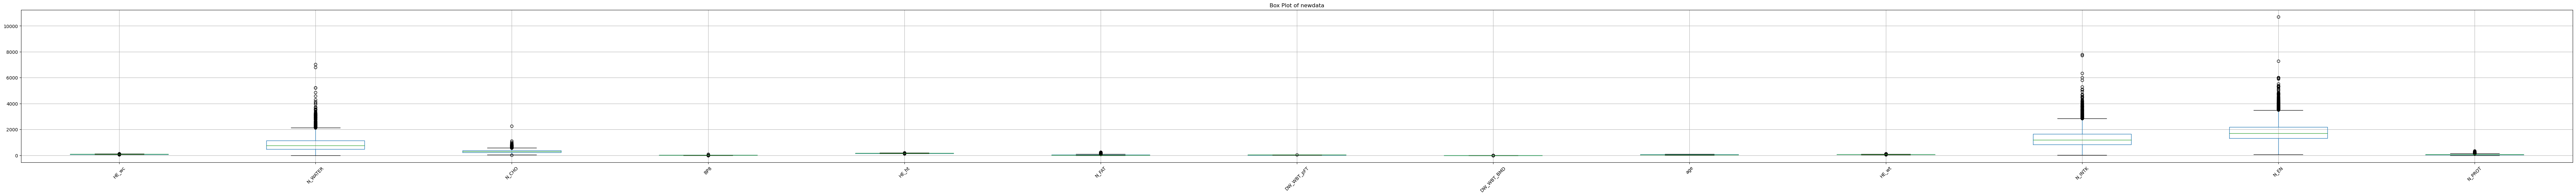

In [35]:
import matplotlib.pyplot as plt

# 이상치 확인을 위한 상자 그림(Box Plot)
plt.figure(figsize=(100 ,6))  # 그래프의 크기 설정
pd.DataFrame(continuous_data).boxplot()  # 각 열에 대한 상자 그림 생성
plt.xticks(rotation=45)  # x축 레이블 회전
plt.title('Box Plot of newdata')  # 그래프 제목 설정
plt.show()  # 그래프 출력

In [36]:
import numpy as np

# 선택한 특성들만 추출
selected_features = ['N_EN', 'N_WATER', 'N_INTK']
data_selected = data[selected_features]

# Z-점수 계산
z_scores = np.abs((data_selected- data_selected.mean()) / data_selected.std())

# 이상치로 판단할 임계값 설정 
threshold = 3

# 이상치 탐지
outliers = np.where(np.any(z_scores > threshold, axis=1))

# 이상치가 있는 행의 인덱스 출력 (겹치는 행은 중복 제거)
outlier_rows = np.unique(outliers[0])
print("Rows with outliers:", len(outlier_rows))

# 이상치가 있는 행들을 전체 데이터프레임에서 삭제
data=data.drop(outlier_rows)

Rows with outliers: 107


In [37]:
continuous_data=data[continuous_col]

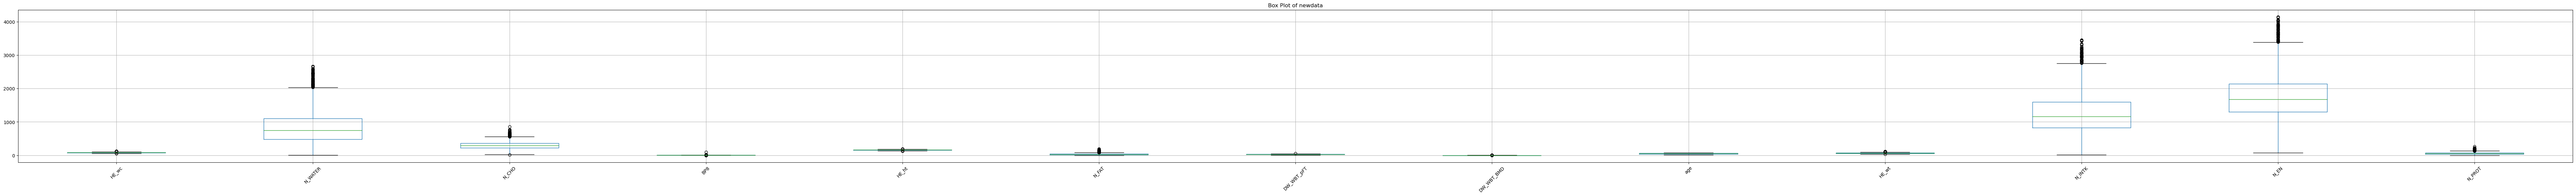

In [38]:
import matplotlib.pyplot as plt

# 이상치 확인을 위한 상자 그림(Box Plot)
plt.figure(figsize=(100 ,6))  # 그래프의 크기 설정
pd.DataFrame(continuous_data).boxplot()  # 각 열에 대한 상자 그림 생성
plt.xticks(rotation=45)  # x축 레이블 회전
plt.title('Box Plot of newdata')  # 그래프 제목 설정
plt.show()  # 그래프 출력

In [39]:
print(len(data)) # 남은 데이터 개수

4024


-------
이상치 탐지 및 제거 마치고 연속형 변수, 목표변수('fat') 분리 후에 남은 카테고리형 변수들 원핫인코딩

In [40]:
#원핫인코딩을 위해서 연속형 변수, 목표 변수 분리
one_hot_encoded=data.drop(continuous_col, axis=1)
one_hot_encoded=one_hot_encoded.drop('fat', axis=1)

print(one_hot_encoded.columns)

Index(['sex', 'DI1_dg', 'DI1_2', 'EC1_1', 'BO1_1', 'BO1_3', 'BO2_1', 'BO3_01',
       'BO3_02', 'BO3_03', 'BO3_05', 'BO3_04', 'BO3_12', 'BO3_07', 'BO3_09',
       'N_DIET'],
      dtype='object')


변수 설명은 메모장에 정리했습니다!


프로파일링

In [41]:
# import pandas_profiling

# pr=one_hot_encoded.profile_report()
# pr.to_file('./pr_report.html')

In [42]:
#정수값 카테고리형으로 변환
one_hot_encoded=one_hot_encoded.astype('category')

encoded_data=pd.get_dummies(one_hot_encoded)

In [43]:
print(encoded_data)

      sex_1  sex_2  DI1_dg_0.0  DI1_dg_1.0  DI1_dg_8.0  DI1_2_1.0  DI1_2_2.0  \
0         0      1           0           0           1          0          0   
1         0      1           0           0           1          0          0   
2         0      1           0           0           1          0          0   
3         0      1           0           0           1          0          0   
4         0      1           0           1           0          0          0   
...     ...    ...         ...         ...         ...        ...        ...   
4126      0      1           0           0           1          0          0   
4127      0      1           0           0           1          0          0   
4128      1      0           0           0           1          0          0   
4129      1      0           0           0           1          0          0   
4130      1      0           0           0           1          0          0   

      DI1_2_3.0  DI1_2_4.0  DI1_2_5.0  

----
원핫인코딩 후 연속형 컬럼, 목표변수('fat')과 병합

In [44]:
data=pd.concat([encoded_data,data[continuous_col],data['fat']], axis=1)
print(len(data.columns))
#data.to_csv("확인용.csv", index=False)

68


모델링

In [45]:
from sklearn.preprocessing import MinMaxScaler

# Min-Max Scaler 객체 생성
scaler = MinMaxScaler()

# 선택할 컬럼 리스트
columns_to_scale = continuous_col

# 선택한 컬럼들에 Min-Max Scaling 적용
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

In [46]:
y = data['fat']
X = data.drop(['fat', 'DW_WBT_pFT','DW_WBT_BMD', 'BO1_1_2.0',
       'BO1_1_3.0', 'BO3_03_1.0', 'BO1_3_8.0', 'BO1_3_1.0', 'BO3_03_0.0',
       'DI1_2_1.0', 'DI1_dg_8.0', 'BO3_01_0.0', 'DI1_2_8.0', 'DI1_dg_1.0',
       'BO3_01_1.0', 'BO2_1_2.0', 'BO2_1_3.0', 'BO3_07_0.0', 'BO2_1_4.0',
       'BO1_3_2.0', 'BO1_3_3.0', 'BO3_07_1.0', 'BO3_12_0.0', 'BO3_04_0.0',
       'DI1_2_5.0', 'BO3_04_8.0', 'BO3_02_0.0', 'BO3_09_0.0', 'BO3_05_0.0',
       'BO3_12_1.0', 'BO3_12_8.0', 'BO3_01_8.0', 'BO3_02_8.0', 'BO3_07_8.0',
       'BO3_09_8.0', 'BO3_04_1.0', 'BO3_03_8.0', 'BO3_05_1.0', 'BO3_02_1.0',
       'BO3_09_1.0', 'BO3_05_8.0', 'DI1_2_2.0', 'DI1_2_9.0', 'DI1_dg_0.0',
       'BO1_3_9.0', 'BO1_1_9.0', 'DI1_2_4.0', 'DI1_2_3.0', 'N_DIET_9.0'  # feature importance로 잘라봄
               
            ], axis=1)

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, stratify=y, random_state=42)

Accuracy: 0.5314569536423841
F1 스코어: 0.5297053658806259
              precision    recall  f1-score   support

           0       0.64      0.63      0.63       404
           1       0.41      0.38      0.39       400
           2       0.54      0.59      0.56       404

    accuracy                           0.53      1208
   macro avg       0.53      0.53      0.53      1208
weighted avg       0.53      0.53      0.53      1208

Index(['HE_wc', 'HE_wt', 'HE_ht', 'N_FAT', 'N_CHO', 'N_PROT', 'age', 'N_EN',
       'N_WATER', 'N_INTK', 'BP8', 'BO2_1_1.0', 'BO1_1_1.0', 'EC1_1_2.0',
       'EC1_1_1.0', 'N_DIET_1.0', 'N_DIET_2.0', 'sex_2', 'sex_1'],
      dtype='object')


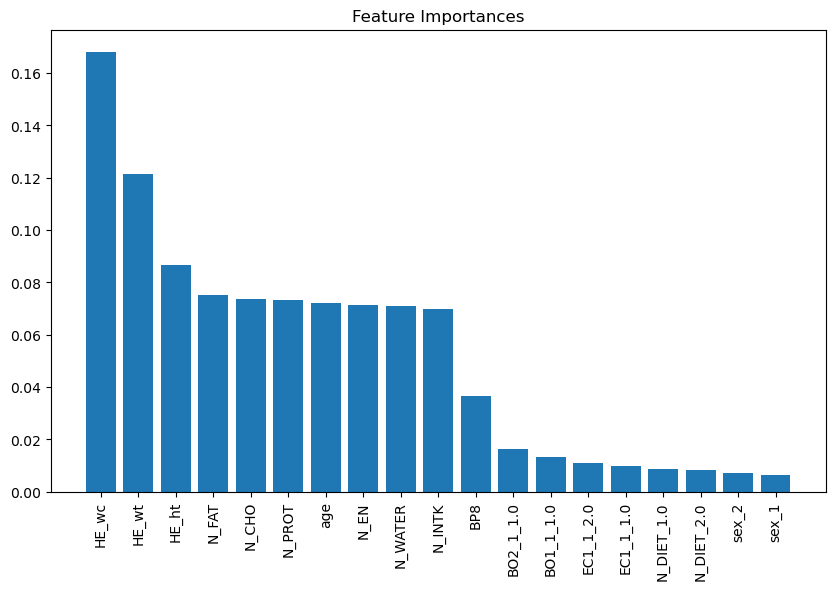

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report

# 모델 객체
rf_classifier = RandomForestClassifier()

# 모델 훈련
rf_classifier.fit(X_train, y_train)

# 예측값
y_pred = rf_classifier.predict(X_test)

# 정확도
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# f1 스코어
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 스코어:", f1)

report = classification_report(y_test, y_pred)
print(report)

# feature importances
importances = rf_classifier.feature_importances_

# 특성 이름
feature_names = X.columns

# 중요도 큰거부터 나오도록 순서 반대로
indices = np.argsort(importances)[::-1]
print(feature_names[indices])

# 시각화
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.show()

4가지 자체 피드백:

###### 1. 위에 선택된 컬럼들을 profiling했을 때, 비해당에 해당하는 값들을 아니오로 바꾸면 예에 해당하는 값이 거의 없음 
###### -> 비해당 값을 아니오로 매핑하는 것보다 컬럼 삭제가 맞는 것 같음.
###### 하지만 컬럼을 없애도 성능은 그대로...

###### 2. 데이터셋 샘플링을 각 범위(정상, 비만 ,과체중)에서 같은 개수만큼 뽑은게 문제일 수도 있수도 있으나,
###### 샘플링 없이 비율을 맞추지 않고 진행했을 때 전체 accuracy는 증가하나, 과체중에 대한 precision, recall이 거의 없어짐

###### => 과체중 예측 범위가 정상, 비만에 비해 좁은 영향이 매우 큰 것 같음
###### 정상: ~22.5
###### 과체중:22.5~24.8 (약 2% 범위)
###### 비만: 22.8~



###### 3. 정상, 비만을 예측하는 모델과 정상, 과체중을 예측하는 모델, 과체중, 비만을 예측하는 모델 3가지를 만들어서 앙상블해보는 것은..? 
###### (다중 클래스(3가지) 예측을 이진 클래스 예측 모델 3개로 분할해서 예측) 
###### 예를 들어 1번 모델에서 정상-> 정상
###### 	2번 모델에서 과체중, 3번모델에서 과체중-> 과체중
###### 	3번 모델, 2번 모델에서 비만 -> 비만
###### 	2번 모델 과체중, 3번 모델 비만-> 1번 모델이 비만이면 비만, 아니면 과체중..?

###### 4. 데이터셋 자체가 너무 별로인 것 일 수도 있음


###### 5. 주관적으로 1차 필터링하지 않고 전체 데이터셋에서 아예 다시 컬럼선택부터 시작해보는 것

###### 6. 성능이 매우 낮아서 파라미터 수정보다는 아예 다시 시작하는 것이 나을 것 같기도함. 